# 100 numpy exercises

This is a collection of exercises that have been collected in the numpy mailing list, on stack overflow
and in the numpy documentation. The goal of this collection is to offer a quick reference for both old
and new users but also to provide a set of exercises for those who teach.


If you find an error or think you've a better way to solve some of them, feel
free to open an issue at <https://github.com/rougier/numpy-100>.

File automatically generated. See the documentation to update questions/answers/hints programmatically.

Run the `initialize.py` module, then for each question you can query the
answer or an hint with `hint(n)` or `answer(n)` for `n` question number.

In [1]:
%run initialise.py
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=5)

In [2]:
"""np.add.reduce() is equivalent to np.sum()
When the argument is a numpy array, np.sum ultimately calls np.add.reduce to do the work. The overhead of handling its argument and dispatching to np.add.reduce is why
np.sum is slower."""

'np.add.reduce() is equivalent to np.sum()\nWhen the argument is a numpy array, np.sum ultimately calls np.add.reduce to do the work. The overhead of handling its argument and dispatching to np.add.reduce is why\nnp.sum is slower.'

In [3]:
arr1 = np.zeros(5, dtype=int)
indices1 = [0, 1, 2, 1, 4]
values1 = [1, 2, 3, 4, 5]
np.add.at(arr1, indices1, values1)
print(arr1)
arr2 = np.zeros(4, dtype=int)
indices2 = [1, 1, 1]
values2 = [10, 20, 30]
np.add.at(arr2, indices2, values2)
print(arr2)

[1 6 3 0 5]
[ 0 60  0  0]


In [4]:
arr3 = np.zeros((3, 3), dtype=int)
indices3 = ([0, 1, 2], [2, 1, 0])
values3 = [5, 10, 15]
np.add.at(arr3, indices3, values3)
print(arr3)

[[ 0  0  5]
 [ 0 10  0]
 [15  0  0]]


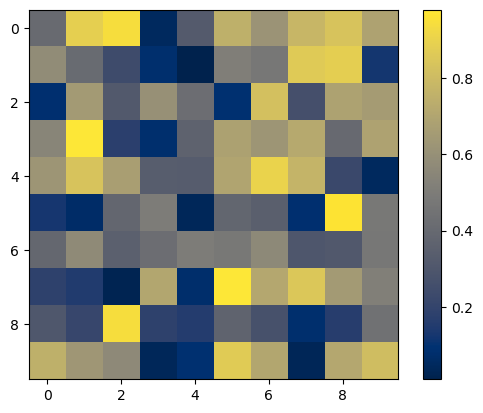

In [5]:
data = np.random.rand(10, 10)
plt.imshow(data, cmap='cividis')
plt.colorbar()
plt.show()

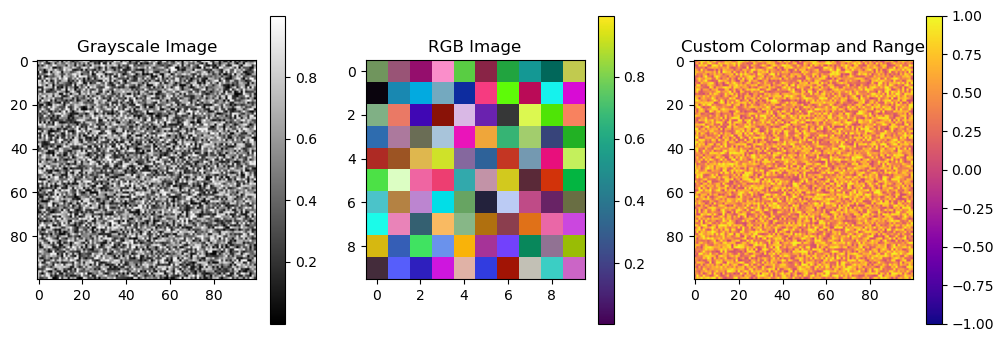

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

data1 = np.random.rand(100, 100)
im1 = ax1.imshow(data1, cmap='gray')
ax1.set_title('Grayscale Image')
fig.colorbar(im1, ax=ax1)

data2 = np.random.rand(10, 10, 3)
im2 = ax2.imshow(data2)
ax2.set_title('RGB Image')
fig.colorbar(im2, ax=ax2)

data3 = np.random.rand(100, 100)
im3 = ax3.imshow(data3, cmap='plasma', vmin=-1, vmax=1)
ax3.set_title('Custom Colormap and Range')
fig.colorbar(im3, ax=ax3)

plt.show()

#### 51. Create a structured array representing a position (x,y) and a color (r,g,b) (★★☆)

In [7]:
dt = np.dtype([('position', [('x', np.float64), ('y', np.float64)]),
               ('color', [('r', np.uint8), ('g', np.uint8), ('b', np.uint8)])])
arr = np.zeros(3, dtype=dt)
arr[0] = ((3.9, 5.4), (2, 4, 6))
arr[1] = ((6.2, 7.3), (1, 2, 3))
arr[2] = ((3.2, 6.7), (32, 34, 61))
print(arr)
print(arr.shape)
print(arr.dtype)
print(arr[0][1][2])

[((3.9, 5.4), ( 2,  4,  6)) ((6.2, 7.3), ( 1,  2,  3))
 ((3.2, 6.7), (32, 34, 61))]
(3,)
[('position', [('x', '<f8'), ('y', '<f8')]), ('color', [('r', 'u1'), ('g', 'u1'), ('b', 'u1')])]
6


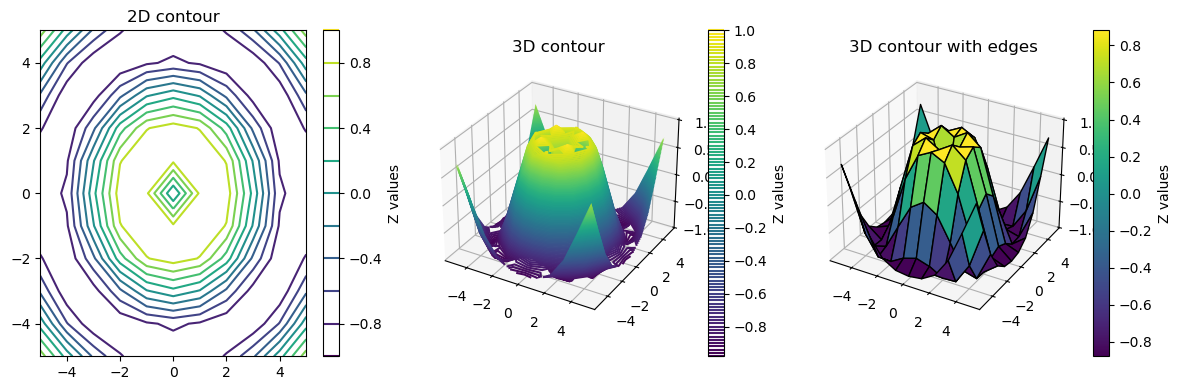

In [8]:
"""draw 2D/3D contours"""
x = np.linspace(-5, 5, 11)
y = np.linspace(-5, 5, 11)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X ** 2 + Y ** 2))
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

im1 = ax1.contour(X, Y, Z, 11, cmap='viridis')
ax1.set_title('2D contour')

im2 = ax2.contour3D(X, Y, Z, 101, cmap='viridis')
ax2.set_title('3D contour')

im3 = ax3.plot_surface(X, Y, Z, cmap='viridis', edgecolor='black')
ax3.set_title('3D contour with edges')

fig.colorbar(im1, ax=ax1, label='Z values')
fig.colorbar(im2, ax=ax2, label='Z values')
fig.colorbar(im3, ax=ax3, label='Z values')
plt.tight_layout()

plt.show()

#### 52. Consider a random vector with shape (100,2) representing coordinates, find point by point distances (★★☆)

In [9]:
random_arr = np.random.rand(10, 2)
random_arr_1 = random_arr[:, np.newaxis, :]
random_arr_2 = random_arr[np.newaxis, :, :]
diff = random_arr_1 - random_arr_2
distances = np.sqrt(np.sum(diff ** 2, axis=-1))
print(diff.shape, distances.shape)

(10, 10, 2) (10, 10)


#### 53. How to convert a float (32 bits) array into an integer (32 bits) in place?

In [10]:
X = np.array([1.5, 2.4, 3.9], dtype=np.float32)
print(X.dtype)
print(X)
X = X.astype(np.int32)
print(X.dtype)
print(X)

float32
[1.5 2.4 3.9]
int32
[1 2 3]


In [11]:
arr = np.array([1, 2, 3, 4], dtype=np.int32)
arr_view = arr.view(dtype=np.int16)
print(arr.flags['OWNDATA'], arr.dtype)
print(arr_view.flags['OWNDATA'], arr_view.dtype)

True int32
False int16


In [12]:
arr = np.arange(8, dtype=np.int32)
arr_view = arr.view()
arr_view.shape = (2, 4)
print(arr.flags['OWNDATA'], arr.shape)
print(arr_view.flags['OWNDATA'], arr_view.shape)
print(arr.base, arr_view.base)

True (8,)
False (2, 4)
None [0 1 2 3 4 5 6 7]


In [13]:
arr_view[1, 2] = 99
print(arr_view)
print(arr)
print(arr.base, arr_view.base)

[[ 0  1  2  3]
 [ 4  5 99  7]]
[ 0  1  2  3  4  5 99  7]
None [ 0  1  2  3  4  5 99  7]


#### 54. How to read the following file? (★★☆)
```
1, 2, 3, 4, 5
6,  ,  , 7, 8
 ,  , 9,10,11
```

In [14]:
from io import StringIO
txt = StringIO('''1, 2, 3, 4, 5
                  6, NA, NaN, 7, 8
                   ,  , 9, 10, 11''')
arr = np.genfromtxt(txt, delimiter=',', missing_values=[
                    "NA"], filling_values=-1)
arr

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6., -1., nan,  7.,  8.],
       [-1., -1.,  9., 10., 11.]])

#### 55. What is the equivalent of enumerate for numpy arrays? (★★☆)

In [15]:
np.random.seed(55)
arr = np.random.rand(3, 4)
print(arr)
for index, value in np.ndenumerate(arr):
    print(f"Index: {index}, Value: {value}")

[[0.09311 0.97166 0.48386 0.24252]
 [0.53112 0.28554 0.86263 0.0411 ]
 [0.10835 0.76716 0.05143 0.77572]]
Index: (0, 0), Value: 0.093108286671858
Index: (0, 1), Value: 0.9716559199897875
Index: (0, 2), Value: 0.4838599804636461
Index: (0, 3), Value: 0.2425227014980641
Index: (1, 0), Value: 0.5311238298072531
Index: (1, 1), Value: 0.2855442354647988
Index: (1, 2), Value: 0.8626303770516396
Index: (1, 3), Value: 0.0411001534608737
Index: (2, 0), Value: 0.10834773395072039
Index: (2, 1), Value: 0.767160045428697
Index: (2, 2), Value: 0.05142870888388429
Index: (2, 3), Value: 0.7757165386439339


In [16]:
for index in np.ndindex(arr.shape):
    print(f"Index: {index}, Value: {arr[index]}")

Index: (0, 0), Value: 0.093108286671858
Index: (0, 1), Value: 0.9716559199897875
Index: (0, 2), Value: 0.4838599804636461
Index: (0, 3), Value: 0.2425227014980641
Index: (1, 0), Value: 0.5311238298072531
Index: (1, 1), Value: 0.2855442354647988
Index: (1, 2), Value: 0.8626303770516396
Index: (1, 3), Value: 0.0411001534608737
Index: (2, 0), Value: 0.10834773395072039
Index: (2, 1), Value: 0.767160045428697
Index: (2, 2), Value: 0.05142870888388429
Index: (2, 3), Value: 0.7757165386439339


In [17]:
array = np.arange(12).reshape(3, 4)
print(
    f"the index of the 8th element in the array is {np.unravel_index(8, array.shape)}")

the index of the 8th element in the array is (2, 0)


#### 56. Generate a generic 2D Gaussian-like array (★★☆)

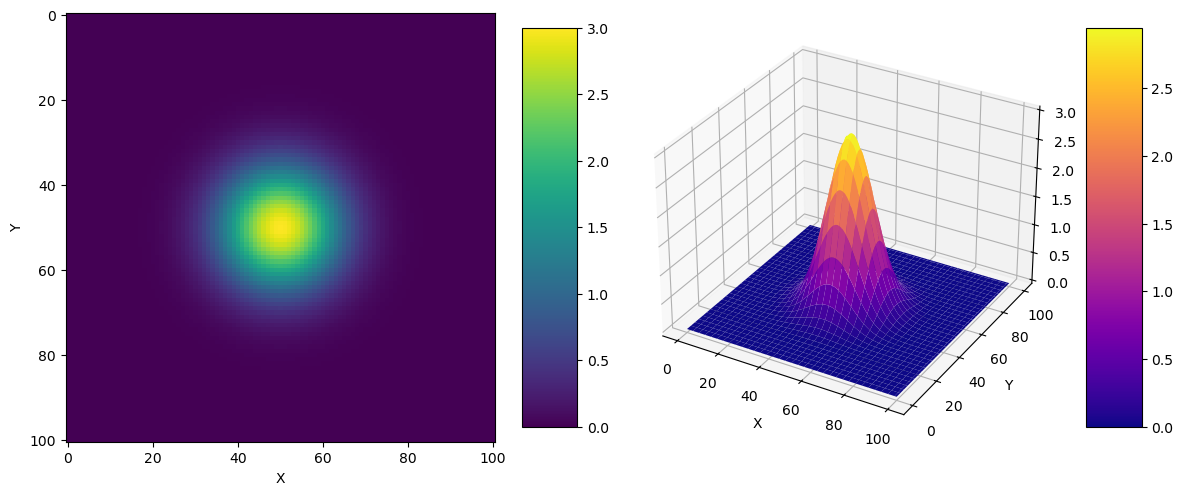

In [18]:
Amplitude = 3
size = 100
sigma_x = 10
sigma_y = 10
x0 = 50
y0 = 50
x = np.linspace(0, size, size + 1)
y = np.linspace(0, size, size + 1)
X, Y = np.meshgrid(x, y)
gaussian_array = Amplitude * np.exp(-(((X - x0) ** 2 / (2 * sigma_x ** 2)) +
                                      ((Y - y0) ** 2 / (2 * sigma_y ** 2))))

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
im1 = ax1.imshow(gaussian_array, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
plt.colorbar(im1, ax=ax1, shrink=0.70, aspect=7.2)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
im2 = ax2.plot_surface(X, Y, gaussian_array, cmap='plasma')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
fig.colorbar(im2, ax=ax2, shrink=0.70, aspect=7.2)
plt.tight_layout()
plt.show()

#### 57. How to randomly place p elements in a 2D array? (★★☆)

In [19]:
np.random.seed(57)
arr = np.random.rand(6, 6)
print("the random array is:")
print(arr)
idx = np.random.choice(arr.size, size=(3, 2), replace=True)
print(idx)
np.put(arr, idx, -1)
print(arr)
a, b = np.unravel_index(idx, (6, 6))
c = np.stack((a, b), axis=-1).reshape(-1, 2)
print(c)
d = np.argsort(c[:, 0])
e = c[d]
print(e)

the random array is:
[[0.08735 0.23048 0.41106 0.31078 0.56596 0.54506]
 [0.8071  0.91816 0.52209 0.42469 0.0718  0.89853]
 [0.42051 0.58217 0.21415 0.44749 0.46786 0.10064]
 [0.92729 0.16099 0.87459 0.05216 0.99228 0.10515]
 [0.40199 0.07184 0.01919 0.72131 0.04147 0.01865]
 [0.08294 0.2809  0.42914 0.01973 0.46167 0.66959]]
[[22 21]
 [ 6  9]
 [27 25]]
[[ 0.08735  0.23048  0.41106  0.31078  0.56596  0.54506]
 [-1.       0.91816  0.52209 -1.       0.0718   0.89853]
 [ 0.42051  0.58217  0.21415  0.44749  0.46786  0.10064]
 [ 0.92729  0.16099  0.87459 -1.      -1.       0.10515]
 [ 0.40199 -1.       0.01919 -1.       0.04147  0.01865]
 [ 0.08294  0.2809   0.42914  0.01973  0.46167  0.66959]]
[[3 4]
 [3 3]
 [1 0]
 [1 3]
 [4 3]
 [4 1]]
[[1 0]
 [1 3]
 [3 4]
 [3 3]
 [4 3]
 [4 1]]


In [20]:
"""np.argsort(a, axis=-1)"""
arr = np.array([1, 3, 9, 5, 2, 8, 7, 6])
print(f"top three elements: {arr[np.argsort(arr)[[-1, -2, -3]]]}")

top three elements: [9 8 7]


#### 58. Subtract the mean of each row of a matrix (★★☆)

In [21]:
np.random.seed(58)
matrix = np.random.randint(0, 10, (3, 3))
print("the matrix is:")
print(matrix)
mean = np.mean(matrix, axis=-1, keepdims=True)
print("the mean is:")
print(mean)
print("the result is:")
print(matrix - mean)

the matrix is:
[[3 0 7]
 [9 5 3]
 [4 9 1]]
the mean is:
[[3.33333]
 [5.66667]
 [4.66667]]
the result is:
[[-0.33333 -3.33333  3.66667]
 [ 3.33333 -0.66667 -2.66667]
 [-0.66667  4.33333 -3.66667]]


#### 59. How to sort an array by the nth column? (★★☆)

In [22]:
np.random.seed(59)
array = np.random.randint(0, 10, (4, 4))
sorted_array = array[array[:, 2].argsort()]
print(array)
print(array[:, 2])
print(sorted_array)

[[1 7 5 9]
 [0 3 0 3]
 [7 9 0 9]
 [4 5 2 6]]
[5 0 0 2]
[[0 3 0 3]
 [7 9 0 9]
 [4 5 2 6]
 [1 7 5 9]]


#### 60. How to tell if a given 2D array has null columns? (★★☆)

In [23]:
matrix_null = np.array([[1, 0, 3], [4, 0, 6], [7, 0, 0]])
null_cols = np.all(matrix_null == 0, axis=0)
print(null_cols)

[False  True False]


In [24]:
null_cols = ~np.any(matrix_null, axis=0)
print(null_cols)

[False  True False]


#### 61. Find the nearest value from a given value in an array (★★☆)

In [25]:
np.random.seed(61)
array = np.random.randint(0, 10, (3, 3))
value = np.array([3, 2, 5]).reshape(3, 1)
absolute = np.abs(array - value)
index = np.argmin(absolute, axis=1)
print(array)
print(absolute)
print(index)
print(list(zip(range(3), index)))

[[3 2 2]
 [0 2 1]
 [7 5 3]]
[[0 1 1]
 [2 0 1]
 [2 0 2]]
[0 1 1]
[(0, 0), (1, 1), (2, 1)]


#### 62. Considering two arrays with shape (1,3) and (3,1), how to compute their sum using an iterator? (★★☆)

In [26]:
arr1 = np.array([[1, 5, 9]])
arr2 = np.array([[10], [20], [30]])
with np.nditer([arr1, arr2, None]) as it:
    for x, y, z in it:
        z[...] = x + y
    print(it.operands[0])
    print(it.operands[1])
    print(it.operands[2])

[[1 5 9]]
[[10]
 [20]
 [30]]
[[11 15 19]
 [21 25 29]
 [31 35 39]]


#### 63. Create an array class that has a name attribute (★★☆)

In [27]:
class NamedArray(np.ndarray):
    def __new__(cls, *args, **kwargs):
        obj = np.asarray(args[0]).view(cls)
        obj.name = args[1]
        obj.value = args[2]
        return obj

    def __array_finalize__(self, obj):
        if obj is None:
            return
        self.name = getattr(obj, 'name', None)
        self.value = getattr(obj, 'value', None)

NamedArray1 = NamedArray(np.arange(12).reshape(3, 4), 'NA1', 25)
print(NamedArray1)
print(type(NamedArray1))
print(NamedArray1.dtype)
print(NamedArray1.name)
print(NamedArray1.value)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
<class '__main__.NamedArray'>
int32
NA1
25


#### 64. Consider a given vector, how to add 1 to each element indexed by a second vector (be careful with repeated indices)? (★★★)

In [28]:
arr = np.array([2, 4, 9, 6, 7, 2, 1, 6, 5])
idx = np.array([0, 2, 3, 3, 2, 4, 0])
counts = np.bincount(idx, minlength=len(arr))
print(counts)
print(arr + counts)

[2 0 2 2 1 0 0 0 0]
[ 4  4 11  8  8  2  1  6  5]


#### 65. How to accumulate elements of a vector (X) to an array (F) based on an index list (I)? (★★★)

In [29]:
X = [1, 2, 3, 4, 5, 6]
I = [1, 3, 9, 3, 4, 1]
F = np.bincount(I, X)
print(F)

[0. 7. 0. 6. 5. 0. 0. 0. 0. 3.]


#### 66. Considering a (w,h,3) image of (dtype=ubyte), compute the number of unique colors (★★☆)

In [30]:
np.random.seed(66)
image = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)
unique= np.unique(image.reshape(-1, 3), axis=0)
print(unique.shape[0])

9994


#### 67. Considering a four dimensions array, how to get sum over the last two axis at once? (★★★)

In [31]:
np.random.seed(67)
arr = np.random.randint(0, 5, (2, 3, 4, 5))
sum_2 = np.sum(arr, axis=2)
sum_3 = np.sum(arr, axis=3)
sum_23 = np.sum(arr, axis=(2, 3))
print(arr)
print(sum_2)
print(sum_3)
print(sum_23)

[[[[3 2 1 1 3]
   [3 1 3 0 3]
   [4 1 2 2 2]
   [3 0 2 1 3]]

  [[2 3 4 2 1]
   [4 0 3 1 2]
   [4 2 4 0 2]
   [2 0 3 4 2]]

  [[3 0 3 4 2]
   [4 3 1 1 1]
   [3 3 4 0 3]
   [0 1 2 4 0]]]


 [[[2 4 3 2 2]
   [4 2 3 1 1]
   [4 0 0 1 0]
   [4 0 0 3 4]]

  [[2 3 0 4 0]
   [1 2 2 1 2]
   [4 3 4 1 3]
   [2 0 3 3 1]]

  [[1 4 4 3 4]
   [4 4 2 0 3]
   [1 1 0 3 0]
   [1 1 0 4 4]]]]
[[[13  4  8  4 11]
  [12  5 14  7  7]
  [10  7 10  9  6]]

 [[14  6  6  7  7]
  [ 9  8  9  9  6]
  [ 7 10  6 10 11]]]
[[[10 10 11  9]
  [12 10 12 11]
  [12 10 13  7]]

 [[13 11  5 11]
  [ 9  8 15  9]
  [16 13  5 10]]]
[[40 45 42]
 [40 41 44]]


#### 68. Considering a one-dimensional vector D, how to compute means of subsets of D using a vector S of same size describing subset  indices? (★★★)

In [32]:
D = np.array([85, 90, 73, 82, 91, 82, 83, 88, 84])
S = np.array([0, 0, 1, 1, 1, 2, 2, 2, 2])
subset_sums = np.bincount(S, weights=D)
subset_counts = np.bincount(S)
subset_avg = subset_sums / subset_counts
print(subset_avg)

[87.5  82.   84.25]


#### 69. How to get the diagonal of a dot product? (★★★)

In [33]:
A = np.array([[1, 5, 7], [3, 5, 2], [1, 2, 4]])
B = np.array([[2, 4, 6], [1, 4, 8], [7, 5, 8]])
method1 = np.diag(np.dot(A, B))
print("method 1:")
print(method1)
method2 = np.sum(A * B.transpose(), axis=-1)
print("method 2:")
print(method2)
method3 = np.einsum('ij, ji->i', A, B)
print("method 3:")
print(method3)

method 1:
[56 42 54]
method 2:
[56 42 54]
method 3:
[56 42 54]


In [34]:
"""np.einsum"""
A = np.array([[1, 5, 7], [3, 5, 2], [1, 2, 4]])
B = np.array([[2, 4, 6], [1, 4, 8], [7, 5, 8]])

s1 = np.einsum('ij,jk->ik', A, B)
print('matrix multiplication:')
print(s1)
print('matrix multiplication using np.dot:')
print(np.dot(A, B))

s2 = np.einsum('ii->', A)
print('sum along diagonal:')
print(s2)
s2_ = np.einsum('ii', A)
print(s2_)

s3 = np.einsum('ij,ij->', A, B)
print('sum over all the elements after multiplication:')
print(s3)
print(np.sum(A * B))

s4 = np.einsum('ij->ji', A)
print('matrix transposition:')
print(s4)

matrix multiplication:
[[ 56  59 102]
 [ 25  42  74]
 [ 32  32  54]]
matrix multiplication using np.dot:
[[ 56  59 102]
 [ 25  42  74]
 [ 32  32  54]]
sum along diagonal:
10
10
sum over all the elements after multiplication:
152
152
matrix transposition:
[[1 3 1]
 [5 5 2]
 [7 2 4]]


In [35]:
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

outer_product = np.einsum('i,j->ij', v1, v2)
print('outer production:')
print(outer_product)

outer production:
[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


In [36]:
arr = np.array([[1, 2], [3, 4]])
sum_over_all = np.einsum('ij->', arr)
print(sum_over_all)
var1 = np.einsum('ij', arr)
print(var1)
var2 = np.einsum('ii', arr)
var3 = np.einsum('ii->', arr)
print(var2, var3)

10
[[1 2]
 [3 4]]
5 5


#### 70. Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value? (★★★)

In [37]:
vec = np.array([1, 2, 3, 4, 5])
zeros = np.zeros(17)
zeros[::4] = vec
print(zeros)

[1. 0. 0. 0. 2. 0. 0. 0. 3. 0. 0. 0. 4. 0. 0. 0. 5.]


#### 71. Consider an array of dimension (5,5,3), how to mulitply it by an array with dimensions (5,5)? (★★★)

In [38]:
arr1 = np.random.random((5, 5, 3))
arr2 = np.random.random((5, 5))
result = arr1 * arr2[:, :, np.newaxis]
print(result.shape)

(5, 5, 3)


#### 72. How to swap two rows of an array? (★★★)

In [39]:
arr = np.array([[1, 5, 6], [2, 3, 5], [2, 5, 8], [9, 2, 8], [7, 8, 0]])
print(arr)
arr[[0, 3]] = arr[[3, 0]]
print(arr)
arr[:, [1, 0]] = arr[:, [0, 1]]
print(arr)

[[1 5 6]
 [2 3 5]
 [2 5 8]
 [9 2 8]
 [7 8 0]]
[[9 2 8]
 [2 3 5]
 [2 5 8]
 [1 5 6]
 [7 8 0]]
[[2 9 8]
 [3 2 5]
 [5 2 8]
 [5 1 6]
 [8 7 0]]


#### 73. Consider a set of 10 triplets describing 10 triangles (with shared vertices), find the set of unique line segments composing all the  triangles (★★★)

In [40]:
triangles = np.array([
    [0, 1, 2],
    [2, 3, 4],
    [0, 2, 4],
    [1, 3, 5],
    [1, 2, 5],
    [0, 1, 3],
    [2, 4, 5],
    [3, 4, 5],
    [0, 1, 4],
    [1, 2, 3]
])


def unique_line_segments(triangles):
    segments = []
    for triangle in triangles:
        edges = [
            sorted((triangle[0], triangle[1])),
            sorted((triangle[0], triangle[2])),
            sorted((triangle[1], triangle[2]))]
        segments.extend(edges)
    segments = np.asarray(segments)
    unique = np.unique(segments, axis=0)
    return unique


print(unique_line_segments(triangles))

[[0 1]
 [0 2]
 [0 3]
 [0 4]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [2 3]
 [2 4]
 [2 5]
 [3 4]
 [3 5]
 [4 5]]


#### 74. Given a sorted array C that corresponds to a bincount, how to produce an array A such that np.bincount(A) == C? (★★★)

In [41]:
np.random.seed(74)
C = np.bincount(np.random.randint(0, 6, 10))
print(C)
A = np.repeat(np.arange(6), C)
print(A)
print(np.bincount(A))

[0 4 1 2 2 1]
[1 1 1 1 2 3 3 4 4 5]
[0 4 1 2 2 1]


In [42]:
b = np.array([1, 2, 3])
repeated_varying = np.repeat(b, [1, 2, 3])
print("Varying repeat:", repeated_varying)

Varying repeat: [1 2 2 3 3 3]


#### 75. How to compute averages using a sliding window over an array? (★★★)

In [43]:
def sliding_window(arr: np.ndarray, size: int):
    ret = np.cumsum(arr)
    ret[size:] = ret[size:] - ret[:-size]
    return ret[size - 1:] / size


arr = np.arange(20)
window_size = 4
print(sliding_window(arr, window_size))

[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5 14.5
 15.5 16.5 17.5]


In [44]:
def another_method(arr: np.ndarray, size: int):
    weights = np.ones(size) / size
    print("weights:")
    print(weights)
    return np.convolve(arr, weights, mode='valid')


arr = np.arange(20)
window_size = 4
print(another_method(arr, window_size))

weights:
[0.25 0.25 0.25 0.25]
[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5 14.5
 15.5 16.5 17.5]


In [45]:
"""PLEASE NOTE: NP.CONVOLVE WOULD FLIP THE WEIGHTS"""
a = np.array([1, 2, 3])
v = np.array([0, 1, 0.5])
result_valid = np.convolve(a, v, mode='valid')
result_same = np.convolve(a, v, mode='same')
result_full = np.convolve(a, v, mode='full')
print("Valid mode:", result_valid)
print("Same mode:", result_same)
print("Full mode:", result_full)

Valid mode: [2.5]
Same mode: [1.  2.5 4. ]
Full mode: [0.  1.  2.5 4.  1.5]


In [46]:
image = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

kernel = np.array([1, 0, -1])

convolved_rows = [np.convolve(row, kernel, mode='valid') for row in image]

print(convolved_rows)
print("Convolved Rows:")
for row in convolved_rows:
    print(row)

[array([2]), array([2]), array([2])]
Convolved Rows:
[2]
[2]
[2]


In [47]:
"""APPEARENTLY, THE CONVOLVE2D ALSO FLIPS THE KERNEL AUTOMATICALLY"""
from scipy import signal
image = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

kernel = np.array([1, 0, 2])

result = signal.convolve2d(image, kernel.reshape(1, 3), mode='valid')
print(result)

[[ 5]
 [14]
 [23]]


#### 76. Consider a one-dimensional array Z, build a two-dimensional array whose first row is (Z[0],Z[1],Z[2]) and each subsequent row is  shifted by 1 (last row should be (Z[-3],Z[-2],Z[-1]) (★★★)

In [48]:
def create_shifted_array(arr: np.ndarray):
    n = len(arr)
    ret = np.zeros((n - 2, 3), dtype=arr.dtype)
    for i in range(n - 2):
        ret[i] = arr[i:i+3]
    return ret


arr = np.array([1, 2, 5, 7, 9, 2, 7, 3])
print(create_shifted_array(arr))

[[1 2 5]
 [2 5 7]
 [5 7 9]
 [7 9 2]
 [9 2 7]
 [2 7 3]]


#### 77. How to negate a boolean, or to change the sign of a float inplace? (★★★)

In [49]:
Z = np.array([2, 5, 8])
# 2     5     8
# 0010  0101  1000
# 1101  1010  0111
Z = ~Z
print(Z)

[-3 -6 -9]


In [50]:
Z = np.array([2, 5, 8, True, False])
print(Z.dtype)
np.logical_not(Z, out=Z)
print(Z)

int32
[0 0 0 0 1]


In [51]:
Z = np.array([2, 5, 8, True, False])
np.negative(Z, out=Z)
print(Z)

[-2 -5 -8 -1  0]


In [52]:
Z = np.array([True, True, False])
print(~Z)
X = np.array([3, 4, 5])
print(-1. * X)

[False False  True]
[-3. -4. -5.]


#### 78. Consider 2 sets of points P0,P1 describing lines (2d) and a point p, how to compute distance from p to each line i (P0[i],P1[i])? (★★★)

In [53]:
"""Chain of Thought
First, we calculate the vectors v1 = P0 - P1 and v2 = P0 - p. Then we determine the ratio t = (v1 * v2) / (v1 * v1) = v2 * cos(theta) / v1, which represents the proportion of the vector v1 that the midpoint vector occupies. Finally, we can compute the coordinates of the midpoint vector, which equals (P0 - t * v1)."""


def distance(p, P0, P1):
    v1 = P0 - P1  # (batches, 2)
    v2 = P0 - p  # (batches, 2)
    t = np.sum(v1 * v2, axis=1) / np.sum(v1 * v1, axis=1)  # (batches,)
    mp = P0 - t[:, np.newaxis] * v1
    dist = np.sqrt(np.sum((mp - p) ** 2, axis=1))
    return dist

In [54]:
np.random.seed(77)
P0 = np.random.randint(0, 10, (10, 2))
np.random.seed(78)
P1 = np.random.randint(0, 10, (10, 2))
p = np.array([3, 6])
print(distance(p, P0, P1))

[1.41421 1.41421 5.91836 5.37587 3.      1.6641  1.      1.34164 0.62017
 0.     ]


#### 79. Consider 2 sets of points P0,P1 describing lines (2d) and a set of points P, how to compute distance from each point j (P[j]) to each line i (P0[i],P1[i])? (★★★)

In [55]:
def distance(p, P0, P1):
    p = p[:, np.newaxis, :]
    P0 = P0[np.newaxis, :, :]
    P1 = P1[np.newaxis, :, :]
    v1 = P0 - P1  # (1, batches, 2)
    v2 = P0 - p  # (batches, batches, 2)
    t = np.sum(v1 * v2, axis=-1) / np.sum(v1 * v1, axis=-1)  # (batches, batches)
    mp = P0 - t[:, :, np.newaxis] * v1
    dist = np.sqrt(np.sum((mp - p) ** 2, axis=-1))
    return dist


np.random.seed(77)
P0 = np.random.randint(0, 10, (10, 2))
np.random.seed(78)
P1 = np.random.randint(0, 10, (10, 2))
np.random.seed(79)
p = np.random.randint(0, 10, (10, 2))
print(distance(p, P0, P1))

[[0.70711 3.53553 1.47959 0.63246 0.      6.37905 3.      3.1305  0.
  4.82808]
 [0.70711 2.12132 5.26077 5.05964 5.      0.5547  0.      2.68328 2.8528
  0.1857 ]
 [0.70711 3.53553 7.23356 6.95701 5.      0.5547  2.      3.57771 1.86052
  1.67126]
 [2.12132 3.53553 8.05555 7.58947 4.      0.27735 3.      3.1305  0.49614
  2.22834]
 [2.12132 3.53553 8.05555 7.58947 4.      0.27735 3.      3.1305  0.49614
  2.22834]
 [0.      4.24264 7.39795 7.27324 6.      1.38675 2.      4.47214 2.72876
  2.04265]
 [3.53553 2.12132 4.27437 3.16228 1.      5.547   0.      2.68328 2.35666
  2.41404]
 [0.70711 2.12132 2.63038 1.89737 1.      4.9923  2.      1.78885 0.3721
  3.52821]
 [1.41421 1.41421 5.91836 5.37587 3.      1.6641  1.      1.34164 0.62017
  0.     ]
 [3.53553 3.53553 8.87755 8.22192 3.      0.      4.      2.68328 0.86824
  2.78543]]


#### 80. Consider an arbitrary array, write a function that extract a subpart with a fixed shape and centered on a given element (pad with a `fill` value when necessary) (★★★)

In [56]:
def create_subpart(arr, center, shape, fill_value=0):

    x, y = center
    height, width = shape
    arr = np.pad(arr, ((height // 2, height - height // 2),
                       (width // 2, width - width // 2)),
                 mode='constant', constant_values=fill_value)
    subpart = arr[x:x+height, y:y+width]
    return subpart

In [57]:
a = np.arange(16).reshape(4, 4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [58]:
create_subpart(a, (0, 0), (9, 4), -1)

array([[-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1,  0,  1],
       [-1, -1,  4,  5],
       [-1, -1,  8,  9],
       [-1, -1, 12, 13],
       [-1, -1, -1, -1]])

In [59]:
create_subpart(a, (1, 1), (3, 3), -1)

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10]])

In [60]:
create_subpart(a, (3, 0), (3, 4), -1)

array([[-1, -1,  8,  9],
       [-1, -1, 12, 13],
       [-1, -1, -1, -1]])

In [61]:
array = np.array([[1, 2], [3, 4]])
padded_array = np.pad(array, pad_width=((1, 2), (2, 1)),
                      mode='constant', constant_values=0)
print(padded_array)

[[0 0 0 0 0]
 [0 0 1 2 0]
 [0 0 3 4 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


#### 81. Consider an array Z = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], how to generate an array R = [[1,2,3,4], [2,3,4,5], [3,4,5,6], ..., [11,12,13,14]]? (★★★)

#### 82. Compute a matrix rank (★★★)

In [62]:
A1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
rank1 = np.linalg.matrix_rank(A1)
print(rank1)

2


In [63]:
A2 = np.array([[2, 0], [1, 2]])
A_cubed = np.linalg.matrix_power(A2, 3)
print(A_cubed)
A_0 = np.linalg.matrix_power(A2, 0)
print(A_0)
A_neg2 = np.linalg.matrix_power(A2, -2)
print(A_neg2)
# 2 0   2 0
# 1 2   1 2
# A * A = [4    0
#          4    4]
# 4 0   2 0
# 4 4   1 2
# A * A * A = [8    0
#              12   8]

[[ 8  0]
 [12  8]]
[[1 0]
 [0 1]]
[[ 0.25  0.  ]
 [-0.25  0.25]]


#### 83. How to find the most frequent value in an array?

In [64]:
arr = np.array([2, 5, 5, 1, 0, 8, 9, 7, 4, 4, 3, 3, 4, 4, 2, 4, 2, 4, 4])
counts = np.bincount(arr)
print(counts)
print(len(counts))
mt1 = counts.argmax()
print(mt1)

[1 1 3 2 7 2 0 1 1 1]
10
4


In [65]:
unique, counts = np.unique(arr, return_counts=True)
mt2 = unique[np.argmax(counts)]
print(mt2)

4


#### 84. Extract all the contiguous 3x3 blocks from a random 10x10 matrix (★★★)

In [66]:
np.random.seed(84)
arr = np.random.randint(0, 9, (10, 10))
print(arr)

[[1 8 5 0 1 4 1 5 8 0]
 [0 4 4 4 7 2 2 7 8 4]
 [1 0 1 0 0 3 3 4 5 8]
 [0 4 2 1 2 6 4 1 1 5]
 [1 1 4 6 7 1 0 7 7 2]
 [3 5 2 2 4 6 4 4 7 5]
 [0 5 3 7 3 3 7 0 6 6]
 [8 7 3 0 1 3 3 7 4 1]
 [0 1 1 7 5 0 2 2 8 1]
 [6 0 3 6 0 5 5 5 3 3]]


In [67]:
shape = (8, 8, 3, 3)
print(arr.strides, type(arr.strides))
strides = arr.strides + arr.strides
print(strides)
result = np.lib.stride_tricks.as_strided(arr, shape=shape, strides=strides)
print(result)

(40, 4) <class 'tuple'>
(40, 4, 40, 4)
[[[[1 8 5]
   [0 4 4]
   [1 0 1]]

  [[8 5 0]
   [4 4 4]
   [0 1 0]]

  [[5 0 1]
   [4 4 7]
   [1 0 0]]

  [[0 1 4]
   [4 7 2]
   [0 0 3]]

  [[1 4 1]
   [7 2 2]
   [0 3 3]]

  [[4 1 5]
   [2 2 7]
   [3 3 4]]

  [[1 5 8]
   [2 7 8]
   [3 4 5]]

  [[5 8 0]
   [7 8 4]
   [4 5 8]]]


 [[[0 4 4]
   [1 0 1]
   [0 4 2]]

  [[4 4 4]
   [0 1 0]
   [4 2 1]]

  [[4 4 7]
   [1 0 0]
   [2 1 2]]

  [[4 7 2]
   [0 0 3]
   [1 2 6]]

  [[7 2 2]
   [0 3 3]
   [2 6 4]]

  [[2 2 7]
   [3 3 4]
   [6 4 1]]

  [[2 7 8]
   [3 4 5]
   [4 1 1]]

  [[7 8 4]
   [4 5 8]
   [1 1 5]]]


 [[[1 0 1]
   [0 4 2]
   [1 1 4]]

  [[0 1 0]
   [4 2 1]
   [1 4 6]]

  [[1 0 0]
   [2 1 2]
   [4 6 7]]

  [[0 0 3]
   [1 2 6]
   [6 7 1]]

  [[0 3 3]
   [2 6 4]
   [7 1 0]]

  [[3 3 4]
   [6 4 1]
   [1 0 7]]

  [[3 4 5]
   [4 1 1]
   [0 7 7]]

  [[4 5 8]
   [1 1 5]
   [7 7 2]]]


 [[[0 4 2]
   [1 1 4]
   [3 5 2]]

  [[4 2 1]
   [1 4 6]
   [5 2 2]]

  [[2 1 2]
   [4 6 7]
   [2 2 4]]

  [[1 2 6]

In [68]:
%run initialise.py
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=5)

#### 85. Create a 2D array subclass such that Z[i,j] == Z[j,i] (★★★)

In [69]:
"""AN ORDINARY CASE"""
class Experiment:
    def __init__(self) -> None:
        self.data = {}
        self.fixed = "HELLO, WORLD!"
    def __setitem__(self, key, value):
        self.data[key] = value
    def __getitem__(self, key):
        return self.data[key]

exp1 = Experiment()
exp1[3] = 5
exp1['hi'] = 'how are you'
print(exp1.data)
print(exp1.fixed)

{3: 5, 'hi': 'how are you'}
HELLO, WORLD!


In [70]:
class SymmetricArray(np.ndarray):
    def __new__(cls, input_array):
        obj = np.array(input_array).view(cls)
        if obj.shape[0] != obj.shape[1]:
            raise ValueError("Error: the input_array must be a square array")
        return obj
    def __setitem__(self, key, value):
        super().__setitem__(key, value)
        x, y = key
        if x != y:
            super().__setitem__((y, x), value)

input_array1 = np.array([[1, 3], [5, 7]])
print(input_array1)
input_array1[1, 0] = -1
print(input_array1)
input_array1_instance = SymmetricArray(input_array1)
input_array1_instance[1, 0] = -9
print(input_array1_instance)

[[1 3]
 [5 7]]
[[ 1  3]
 [-1  7]]
[[ 1 -9]
 [-9  7]]


#### 86. Consider a set of p matrices with shape (n,n) and a set of p vectors with shape (n,1). How to compute the sum of the p matrix products at once? (result has shape (n,1)) (★★★)

In [71]:
n = 3
p = 5

In [72]:
np.random.seed(86)
matrices = np.random.randint(0, 10, (p, n, n))
np.random.seed(87)
vectors = np.random.randint(0, 10, (p, n, 1))
result_t = np.einsum('pij,pjk->pik', matrices, vectors)
print(result_t)
result = np.einsum('pij,pjk->ik', matrices, vectors)
print(result)

[[[ 42]
  [156]
  [102]]

 [[ 60]
  [ 12]
  [ 66]]

 [[  9]
  [ 54]
  [ 27]]

 [[ 66]
  [ 81]
  [ 80]]

 [[ 72]
  [158]
  [122]]]
[[249]
 [461]
 [397]]


In [73]:
a = np.array([[1, 2],
              [3, 4]])
b = np.array([[5, 6],
              [7, 8]])

result0 = np.tensordot(a, b, axes=0)
result1 = np.tensordot(a, b, axes=1)
result2 = np.tensordot(a, b, axes=2)
print(result0)
print(result1)
print(result2)
# 1*5+2*6+3*7+4*8=5+12+21+32=70

[[[[ 5  6]
   [ 7  8]]

  [[10 12]
   [14 16]]]


 [[[15 18]
   [21 24]]

  [[20 24]
   [28 32]]]]
[[19 22]
 [43 50]]
70


In [74]:
a = np.array([[[1, 2],
               [3, 4]],
              [[5, 6],
               [7, 8]]])
b = np.array([[[9, 10],
               [11, 12]],
              [[13, 14],
               [15, 16]]])

result0 = np.tensordot(a, b, axes=([0, 1], [0, 1]))
result1 = np.tensordot(a, b, axes=([0, 1], [1, 2]))
print(result0)
print(result1)
ein1 = np.einsum('ijk,ijl->kl', a, b)
# kl -> (1,0)
# 2*9 + 4*11 + 6*13 + 8*15
print(ein1)
ein2 = np.einsum('ijk,pij->kp', a, b)
# kp -> (0,1)
# 1*13 + 3*14 + 5*15 + 7*16
print(ein2)

[[212 228]
 [260 280]]
[[178 242]
 [220 300]]
[[212 228]
 [260 280]]
[[178 242]
 [220 300]]


In [75]:
a = np.arange(24).reshape(2, 3, 4)
b = np.arange(8).reshape(2, 4, 1)
print(a)
print(b)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[[[0]
  [1]
  [2]
  [3]]

 [[4]
  [5]
  [6]
  [7]]]


In [76]:
result = np.einsum('pij,pjk->pik', a, b)
print(result)

[[[ 14]
  [ 38]
  [ 62]]

 [[302]
  [390]
  [478]]]


In [77]:
result0 = np.einsum('pij,pjk->p', a, b)
print(result0)
# 14+38+62=114

result1 = np.einsum('pij,pjk->k', a, b)
print(result1)
result2 = np.einsum('pij,pjk->', a, b)
print(result2)
result3 = np.einsum('pij,pjk->ik', a, b)
print(result3)
result4 = np.einsum('pij,pjk', a, b)
print(result4)

[ 114 1170]
[1284]
1284
[[316]
 [428]
 [540]]
[[316]
 [428]
 [540]]


In [78]:
%run initialise.py
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=5)

#### 87. Consider a 16x16 array, how to get the block-sum (block size is 4x4)? (★★★)

In [79]:
# Consider a 4 * 4 array
# Get the block-sum (2 * 2)
arr = np.arange(16).reshape(2, 2, 2, 2)
block_sum = arr.sum(axis=(2, 3))
print(arr)
print(block_sum)

[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]]
[[ 6 22]
 [38 54]]


#### 88. How to implement the Game of Life using numpy arrays? (★★★)

In [80]:
arr = np.array([1, 2, 3, 4, 5])
rolled_arr = np.roll(arr, 2)
print(rolled_arr)

[4 5 1 2 3]


In [81]:
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
rolled_arr = np.roll(arr, 2, 0)
print(rolled_arr)

[[4 5 6]
 [7 8 9]
 [1 2 3]]


In [82]:
def game(grid, steps):

    def count_neighbours(grid):
        neighbours = (np.roll(np.roll(grid, 1, 0), 1, 1) +
                      np.roll(grid, 1, 1) +
                      np.roll(np.roll(grid, -1, 0), 1, 1) +
                      np.roll(grid, 1, 0) +
                      np.roll(grid, -1, 0) +
                      np.roll(np.roll(grid, 1, 0), -1, 1) +
                      np.roll(grid, -1, 1) +
                      np.roll(np.roll(grid, -1, 0), -1, 1))
        return neighbours

    for _ in range(steps):
        neighbours = count_neighbours(grid)

        grid = np.where((grid == 1) & (
            (neighbours > 3) | (neighbours < 2)), 0, grid)
        grid = np.where((grid == 0) & (neighbours == 3), 1, grid)

    return grid


np.random.seed(88)
initial_grid = np.random.randint(0, 2, (10, 10))
steps = 10
final_grid = game(initial_grid, steps)
print(initial_grid)
print(final_grid)

[[0 0 1 1 0 0 1 0 1 0]
 [1 0 0 0 0 1 1 0 1 0]
 [1 1 1 0 0 0 1 1 1 1]
 [1 0 0 0 0 0 0 1 0 0]
 [0 1 1 1 1 1 0 1 1 0]
 [1 1 1 0 1 1 1 1 1 0]
 [1 0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 0 1 1 0 1]
 [0 0 1 1 0 0 1 1 0 0]
 [1 0 1 1 1 0 1 1 0 1]]
[[0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 0 0 0]]


#### 89. How to get the n largest values of an array (★★★)

In [83]:
np.random.seed(89)
arr = np.random.randint(0, 15, 28)
print(arr)
print(np.sort(arr))
n = 3
index = np.argsort(arr)[-n]
value = arr[index]
print(value)

[ 3 14  4 13  6 11  5 10  8  2 12  1 10 11  7 14  8 13  0  7  6  4  1 13
  6  8  6  6]
[ 0  1  1  2  3  4  4  5  6  6  6  6  6  7  7  8  8  8 10 10 11 11 12 13
 13 13 14 14]
13


In [84]:
sorted_uniques = np.sort(np.unique(arr))
value = sorted_uniques[-n]
print(value)

12


#### 90. Given an arbitrary number of vectors, build the cartesian product (every combinations of every item) (★★★)

In [85]:
def build_cartesian_product(*arrays):
    grids = np.meshgrid(*arrays, indexing='ij')
    product = np.stack(grids, axis=-1).reshape(-1, len(arrays))
    return product


arr1 = np.array([1, 2, 3])
arr2 = np.array([11, 22, 33])
arr3 = np.array([111, 222, 333, 444])
print(build_cartesian_product(arr1, arr2, arr3))
print(build_cartesian_product(arr1, arr2, arr3).shape)

[[  1  11 111]
 [  1  11 222]
 [  1  11 333]
 [  1  11 444]
 [  1  22 111]
 [  1  22 222]
 [  1  22 333]
 [  1  22 444]
 [  1  33 111]
 [  1  33 222]
 [  1  33 333]
 [  1  33 444]
 [  2  11 111]
 [  2  11 222]
 [  2  11 333]
 [  2  11 444]
 [  2  22 111]
 [  2  22 222]
 [  2  22 333]
 [  2  22 444]
 [  2  33 111]
 [  2  33 222]
 [  2  33 333]
 [  2  33 444]
 [  3  11 111]
 [  3  11 222]
 [  3  11 333]
 [  3  11 444]
 [  3  22 111]
 [  3  22 222]
 [  3  22 333]
 [  3  22 444]
 [  3  33 111]
 [  3  33 222]
 [  3  33 333]
 [  3  33 444]]
(36, 3)


#### 91. How to create a record array from a regular array? (★★★)

In [86]:
x1 = np.array([1, 2, 3, 4])
x2 = np.array(['a', 'dd', 'xyz', '12'])
x3 = np.array([1.1, 2, 3, 4])
print(x3.dtype)

r = np.core.records.fromarrays([x1, x2, x3], names='first, second, third')
print(r[1])
print(r.first)

float64
(2, 'dd', 2.)
[1 2 3 4]


In [87]:
y1 = np.array([1, 2, 3, 4])
y2 = np.array(['a', 'dd', 'xyz', '12'])
y3 = np.array([1.1, 2, 3, 4])
y = np.stack((y1, y2, y3), axis=0)
print(y)

record = np.core.records.fromarrays(y, names='one, two, three')
print(record)
print(record[1])
print(record.two)

[['1' '2' '3' '4']
 ['a' 'dd' 'xyz' '12']
 ['1.1' '2.0' '3.0' '4.0']]
[('1', 'a', '1.1') ('2', 'dd', '2.0') ('3', 'xyz', '3.0')
 ('4', '12', '4.0')]
('2', 'dd', '2.0')
['a' 'dd' 'xyz' '12']


In [88]:
y1 = np.array([1, 2, 3, 4])
y2 = np.array(['a', 'dd', 'xyz', '12'])
y3 = np.array([1.1, 2, 3, 4])
y = np.stack((y1, y2, y3), axis=0).T
print(y)

record = np.core.records.fromarrays(y, names='one, two, three, four')
print(record)
print(record[1])
print(record.two)
print(record.four)

[['1' 'a' '1.1']
 ['2' 'dd' '2.0']
 ['3' 'xyz' '3.0']
 ['4' '12' '4.0']]
[('1', '2', '3', '4') ('a', 'dd', 'xyz', '12')
 ('1.1', '2.0', '3.0', '4.0')]
('a', 'dd', 'xyz', '12')
['2' 'dd' '2.0']
['4' '12' '4.0']


#### 92. Consider a large vector Z, compute Z to the power of 3 using 3 different methods (★★★)

In [89]:
Z = np.arange(12)
result = np.einsum('i,i,i->i', Z, Z, Z)
result

array([   0,    1,    8,   27,   64,  125,  216,  343,  512,  729, 1000,
       1331])

#### 93. Consider two arrays A and B of shape (8,3) and (2,2). How to find rows of A that contain elements of each row of B regardless of the order of the elements in B? (★★★)

In [90]:
A = np.array([[2, 4, 1],
              [2, 3, 4],
              [5, 6, 7],
              [1, 2, 5],
              [1, 3, 4],
              [1, 2, 4],
              [4, 5, 6],
              [2, 4, 6]])
B = np.array([[1, 2],
              [2, 4]])

def search_rows(arr1, arr2):
    elements = np.unique(arr2.flatten())
    mask = np.array([np.all(np.isin(elements, row)) for row in arr1])
    return arr1[mask]

print(search_rows(A, B))

[[2 4 1]
 [1 2 4]]


#### 94. Considering a 10x3 matrix, extract rows with unequal values (e.g. [2,2,3]) (★★★)

In [91]:
arr = np.array([[1, 2, 3],
                ['string', 'integer', 'float'],
                [1, 2, 6],
                [0, 0, 0],
                [7, 8, 8],
                [9, 9, 2],
                [7, 8, 8],
                [6, 3, 6],
                [7, 7, 7],
                [3, 3, 3],
                ['NUMBER', 'NUMBER', 'NUMBER'],
                [np.nan, np.nan, 3],
                [np.nan, np.nan, np.nan],
                ['King', 'Queen', 'King']])
mask = ~np.all(arr == arr[:, [0]], axis=1)
unequal = np.unique(arr[mask], axis=0)
unequal

array([['1', '2', '3'],
       ['1', '2', '6'],
       ['6', '3', '6'],
       ['7', '8', '8'],
       ['9', '9', '2'],
       ['King', 'Queen', 'King'],
       ['nan', 'nan', '3'],
       ['string', 'integer', 'float']], dtype='<U32')

#### 95. Convert a vector of ints into a matrix binary representation (★★★)

In [92]:
# method 1
ints = np.array([3, 1023, 65535, 78787878], dtype=np.int32)
ints_view = ints.view(np.uint8)
print(ints_view)
bits = np.unpackbits(ints_view)
print(bits.reshape(-1, 4, 8))

[  3   0   0   0 255   3   0   0 255 255   0   0  38  53 178   4]
[[[0 0 0 0 0 0 1 1]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]]

 [[1 1 1 1 1 1 1 1]
  [0 0 0 0 0 0 1 1]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]]

 [[1 1 1 1 1 1 1 1]
  [1 1 1 1 1 1 1 1]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]]

 [[0 0 1 0 0 1 1 0]
  [0 0 1 1 0 1 0 1]
  [1 0 1 1 0 0 1 0]
  [0 0 0 0 0 1 0 0]]]


In [93]:
# method 2
ints = np.array([3, 1023, 65535, 78787878], dtype=np.int32)
bit_width = np.ceil(np.log2(ints.max() + 1)).astype(np.int32)
result = np.array([list(np.binary_repr(i, bit_width))
                  for i in ints]).astype(np.int32)
print(bit_width)
print(result)

27
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0]]


#### 96. Given a two dimensional array, how to extract unique rows? (★★★)

In [94]:
arr = np.array([[1, 2, 3], [4, 5, 6], [1, 2, 3]])
unique = np.unique(arr, axis=0)
unique

array([[1, 2, 3],
       [4, 5, 6]])

#### 97. Considering 2 vectors A & B, write the einsum equivalent of inner, outer, sum, and mul function (★★★)

In [95]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

inner = np.einsum('i,i->', A, B)
print(inner) # 4+10+18=32

32


In [96]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

outer = np.einsum('i,j->ij', A, B)
print(outer)

[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


In [97]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

summation = np.einsum('i->', A) + np.einsum('i->', B)
print(summation)

21


In [98]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

mul = np.einsum('i,i->i', A, B)
print(mul)

[ 4 10 18]


#### 98. Considering a path described by two vectors (X,Y), how to sample it using equidistant samples (★★★)?

In [99]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 1, 0.5, -1, 0])

In [100]:
dists = np.sqrt(np.diff(X) ** 2 + np.diff(Y) ** 2)
cumulative_dists = np.concatenate(([0], np.cumsum(dists)))
print(dists)
print(cumulative_dists)

[1.41421 1.11803 1.80278 1.41421]
[0.      1.41421 2.53225 4.33502 5.74924]


In [101]:
num_samples = 10
equidistant_points = np.linspace(0, cumulative_dists[-1], num_samples)
print(equidistant_points)

[0.      0.6388  1.27761 1.91641 2.55522 3.19402 3.83282 4.47163 5.11043
 5.74924]


In [102]:
X_samples = np.interp(equidistant_points, cumulative_dists, X)
Y_samples = np.interp(equidistant_points, cumulative_dists, Y)

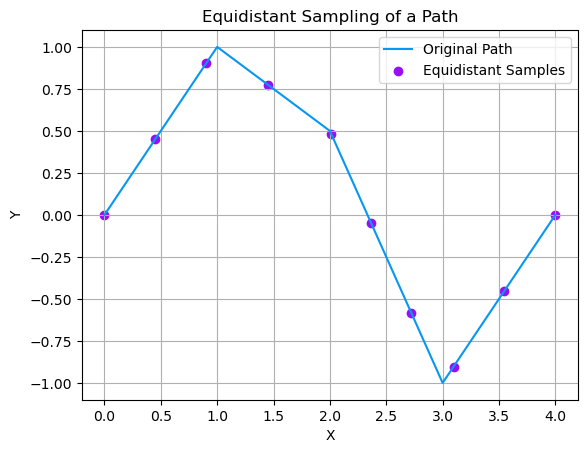

In [103]:
plt.plot(X, Y, label='Original Path', color='#0597F2')
plt.scatter(X_samples, Y_samples, label='Equidistant Samples',
            color='#970FF2', marker='o')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Equidistant Sampling of a Path')
plt.grid()
plt.show()

#### 99. Given an integer n and a 2D array X, select from X the rows which can be interpreted as draws from a multinomial distribution with n degrees, i.e., the rows which only contain integers and which sum to n. (★★★)

In [104]:
def select_multinomial_rows(X, n):
    X = np.array(X)
    rows = (np.all(X.astype(int) == X, axis=1)) & (X.sum(axis=1) == n)
    return X[rows]


X = np.array([[1, 2, 3],
              [2, 3, 4],
              [3, 4, 5],
              [3, 2, 1],
              [2, 1, 3]])
print(select_multinomial_rows(X, 6))

[[1 2 3]
 [3 2 1]
 [2 1 3]]


#### 100. Compute bootstrapped 95% confidence intervals for the mean of a 1D array X (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means). (★★★)

In [105]:
def bootstrap_ci(X, n_bootstraps=1000, alpha=0.05):

    n = len(X)
    means = np.empty(n_bootstraps)

    for i in range(n_bootstraps):
        sample = np.random.choice(X, size=n, replace=True)
        means[i] = np.mean(sample)

    lower_bound = np.percentile(means, 100 * (alpha / 2))
    upper_bound = np.percentile(means, 100 * (1 - alpha / 2))

    return lower_bound, upper_bound


X = np.array([1, 2, 3, 4, 5])
ci = bootstrap_ci(X)
print(f"95% Confidence Interval: {ci}")

95% Confidence Interval: (1.8, 4.2)
